<div style="background-color: black; color: white; padding: 10px;text-align: center;">
  <strong>Date Published:</strong> November 20, 2025  -  <strong>Author:</strong> Adnan Alaref
</div>

# 📝 Understanding Simple RNNs from Scratch (NumPy)

This notebook implements **Simple Recurrent Neural Networks (RNNs)** using NumPy in two forms:

1. **Single-sequence RNN (`SimpleRnnLayer`)** – processes one sequence at a time.  
2. **Batch-compatible RNN (`SimpleRNN`)** – processes multiple sequences simultaneously.  

Both implementations show the fundamental operations of RNNs: **hidden state update, output computation, and temporal propagation**.

---

# 1️⃣ RNN Concepts

RNNs handle **sequential data** (time series, text, etc.).

At each time step `t`:

- Input vector `x_t` is combined with the previous hidden state `h_{t-1}`.  
- A non-linear activation (here `tanh`) produces the new hidden state `h_t`.  
- The hidden state is used to compute the output `y_t`.  

**Equations:**

The hidden state in a vanilla RNN is computed as:

$$
h_t = \tanh\left( W_{xh} x_t + b_{xh} + W_{hh} h_{t-1} + b_{hh} \right)
$$

$$
y_t = W_{ho} h_t + b_o
$$


<div style="text-align: center;">
  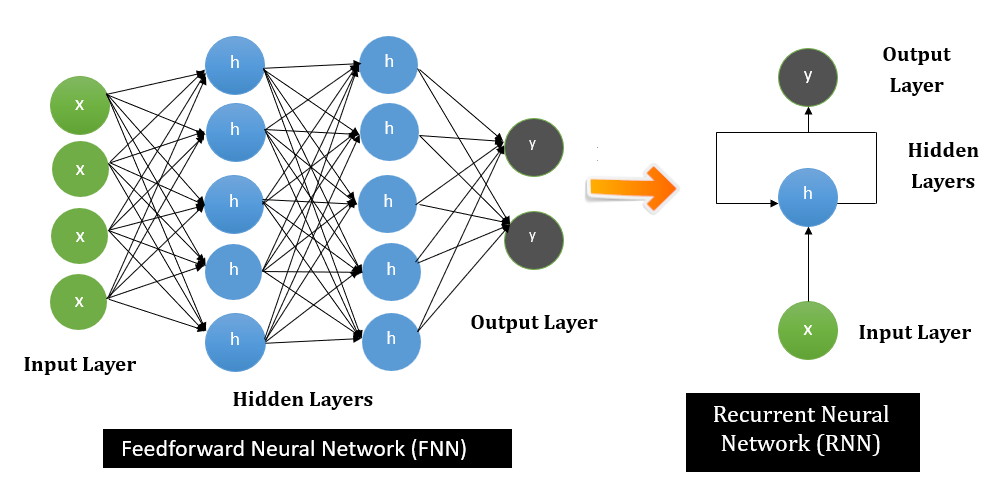
  <br>
  <em>Figure 1: Architecture of a Recurrent Neural Network</em>
</div>
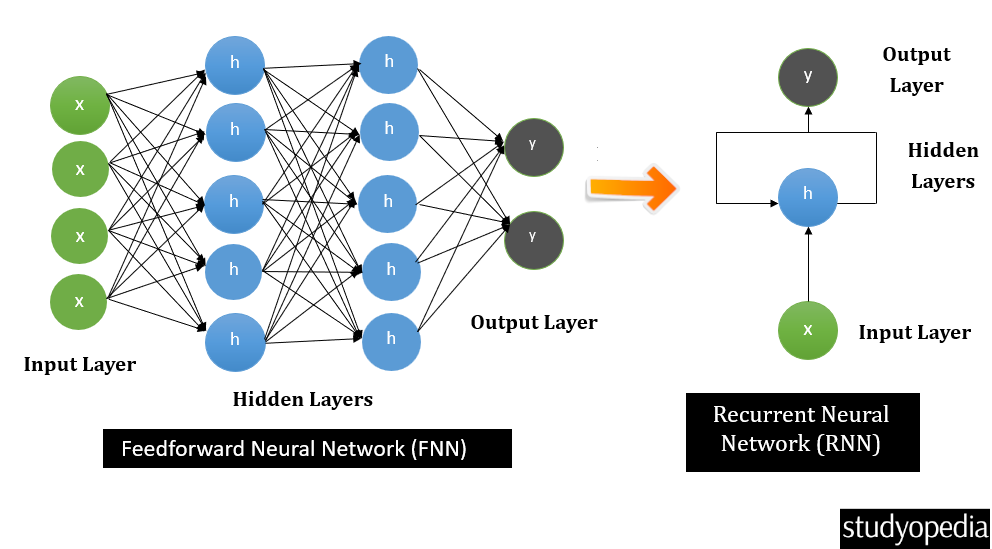

<a id="lb"></a>
<div style="background: linear-gradient(to right, #1b5e20, #2e7d32, #388e3c, #43a047, #4caf50); font-family: 'Times New Roman', serif; font-size: 28px; font-weight: bold; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2); -webkit-background-clip: text; -webkit-text-fill-color: transparent;">
    Import Library.
</div>

In [1]:
import numpy as np
from typing import Tuple, Dict
from dataclasses import dataclass

import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings(action='ignore', category=FutureWarning)

<a id="lb"></a>
<div style="background: linear-gradient(to right, #1b5e20, #2e7d32, #388e3c, #43a047, #4caf50); font-family: 'Times New Roman', serif; font-size: 28px; font-weight: bold; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2); -webkit-background-clip: text; -webkit-text-fill-color: transparent;">
    Single-sequence RNN (SingleSequenceRNN).
</div>

In [2]:
class SingleSequenceRNN:
  def __init__(self, ins_dim, hids_dim, outs_dim) -> None:
     # Input → hidden weight
    self.W_xh = np.random.randn(hids_dim, ins_dim)
    self.b_xh = np.zeros((hids_dim,1))

    # Hidden → hidden weights (recurrent link)
    self.W_hh = np.random.randn(hids_dim, hids_dim)
    self.b_hh = np.zeros((hids_dim,1))

    # Hidden → output weights
    self.W_ho = np.random.randn(output_size, hidden_size)
    self.b_ho = np.zeros((output_size, 1))

  def forward(self, inputs:np.ndarray) ->Tuple[Dict[int,np.ndarray], Dict[int,np.ndarray]]:
    step_output: Dict[int, np.ndarray] = {}
    hidden_states:Dict[int,np.ndarray] = {}

    # Initial hidden state
    hidden_states[-1] = np.zeros((self.W_xh.shape[0],1))

    for t in range(len(inputs)):
      x = inputs[t].reshape(-1,1) # (input_size, 1)
      cur_hidden = np.dot(self.W_xh,x) + self.b_xh

      hidden_states[t] = np.dot(self.W_hh, hidden_states[t-1]) + self.b_hh # Add more transformation
      hidden_states[t] += cur_hidden
      # Update hidden state with tanh activation
      hidden_states[t] = np.tanh(hidden_states[t])


      # Compute output for current step
      step_output[t] = np.dot(self.W_ho, hidden_states[t]) + self.b_ho

    return step_output, hidden_states

if __name__ == '__main__':
  sequence_length = 10
  input_size = 9
  hidden_size = 4
  output_size = 3

  rnn_layer = SingleSequenceRNN(input_size, hidden_size, output_size)

  # 10 steps, each step has feature vector of length 9
  inputs = [np.random.randn(input_size) for _ in range(sequence_length)]
  output, hidden_states = rnn_layer.forward(inputs)

  print("Hidden states keys:", hidden_states.keys())
  print("Output keys:", output.keys())

Hidden states keys: dict_keys([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Output keys: dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


**Before tanh**:  
* **t** and **t-1** reference same array:
```
h[t-1] ───► [shared array]
              ▲
              └── h[t]
```
```
    h[t-1] -------┐
                  ▼
               [array]
                  ▲
    h[t] ---------┘
```
---
**After tanh:**
* t points to a new array:
```
h[t-1] ───► [old array]
h[t]   ───► [new array from tanh(...)]
```

Without `tanh` we can must make hidden_states[t-1].copy()

In [3]:
print("Is h[0] the same object as h[9]?", hidden_states[0] is hidden_states[9])

Is h[0] the same object as h[9]? False


In [4]:
print({t:hidden_states[t] for t in range(2,4)})
print({t:output[t] for t in range(2,6)})

{2: array([[ 0.99999146],
       [-0.99885586],
       [-0.99999936],
       [ 0.99672273]]), 3: array([[ 0.99010756],
       [-0.65301815],
       [ 0.99999804],
       [-0.61708954]])}
{2: array([[ 3.23322696],
       [-0.9443707 ],
       [-2.3476023 ]]), 3: array([[ 0.54043569],
       [ 1.62303465],
       [-1.24699543]]), 4: array([[ 3.22897206],
       [-0.94211325],
       [-2.33866517]]), 5: array([[-0.21969291],
       [ 0.29133711],
       [ 0.89544711]])}


<a id="lb"></a>
<div style="background: linear-gradient(to right, #1b5e20, #2e7d32, #388e3c, #43a047, #4caf50); font-family: 'Times New Roman', serif; font-size: 28px; font-weight: bold; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2); -webkit-background-clip: text; -webkit-text-fill-color: transparent;">
    Batch-compatible RNN (BatchRNN)
</div>

In [5]:
@dataclass
class Config:
  sequence_length = 10
  batch_size = 5
  input_size = 9
  hidden_size = 4
  output_size = 3
    
cfg = Config()  

In [6]:
class BatchRNN:
  def __init__(self, input_size, hidden_size, output_size) -> None:
    # Input → hidden weights
    self.W_xh = np.random.randn(hidden_size, input_size)
    self.b_xh = np.zeros((hidden_size, 1))

    # Hidden → hidden weights (recurrent)
    self.W_hh = np.random.randn(hidden_size, hidden_size)
    self.b_hh = np.zeros((hidden_size, 1))

    # Hidden → output weights
    self.W_ho = np.random.randn(output_size, hidden_size)
    self.b_ho = np.zeros((output_size, 1))

  def forward(self, inputs:np.ndarray)->Tuple[Dict[int,np.ndarray], Dict[int,np.ndarray]]:
    """
      inputs: shape (sequence_length, batch_size, input_size)
      Returns:
          step_output: dict mapping t -> output (output_size, batch_size)
          hidden_states: dict mapping t -> hidden state (hidden_size, batch_size)
    """
    seq_length, batch_size, input_size = inputs.shape

    step_output:Dict[int, np.ndarray] = {}
    hidden_states:Dict[int, np.ndarray] = {}

    # Initialize hidden state for the whole batch
    hidden_states[-1] = np.zeros((self.W_xh.shape[0], batch_size))

    for t in range(seq_length):
      x = inputs[t].T   # shape: (input_size, batch_size)
      cur_hidden = np.dot(self.W_xh, x) + self.b_xh

      hidden_states[t] = np.dot(self.W_hh, hidden_states[t-1]) + self.b_hh
      hidden_states[t] +=cur_hidden
      hidden_states[t] = np.tanh(hidden_states[t])

      step_output[t] = np.dot(self.W_ho, hidden_states[t]) + self.b_ho

    # Compute output
    return step_output, hidden_states

if __name__ == '__main__':
 
  Rnn_layer = BatchRNN(cfg.input_size,cfg.hidden_size,cfg.output_size)

  # Create inputs: shape (sequence_length, batch_size, input_size)
  inputs = np.random.randn(cfg.sequence_length, cfg.batch_size, cfg.input_size)

  output_step , hidden_states = Rnn_layer.forward(inputs)

  print("Hidden states keys:", hidden_states.keys())
  print("Output keys:", output_step.keys())
  print("Example hidden state shape:", hidden_states[0].shape)
  print("Example output shape:", output_step[0].shape)

Hidden states keys: dict_keys([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Output keys: dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Example hidden state shape: (4, 5)
Example output shape: (3, 5)


<a id="lb"></a>
<div style="background: linear-gradient(to right, #1b5e20, #2e7d32, #388e3c, #43a047, #4caf50); font-family: 'Times New Roman', serif; font-size: 28px; font-weight: bold; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2); -webkit-background-clip: text; -webkit-text-fill-color: transparent;">
    Comparison of Both Implementations.
</div>

| Feature               | `SimpleRnnLayer`           | `SimpleRNN`                         |
|-----------------------|---------------------------|------------------------------------|
| **Input type**        | List of vectors           | 3D array `(sequence_length, batch_size, input_size)` |
| **Batch processing**  | No                        | Yes                                |
| **Hidden state shape**| `(hidden_size, 1)`        | `(hidden_size, batch_size)`        |
| **Output shape**      | `(output_size, 1)`        | `(output_size, batch_size)`        |
| **Use case**          | Single sequence           | Multiple sequences (batches)       |


<a id="Import"></a>
<p style="background-color: #000000; font-family: 'Verdana', sans-serif; color: #FFFFFF; font-size: 160%; text-align: center; border-radius: 25px; padding: 12px 20px; margin-top: 20px; border: 2px solid transparent; background-image: linear-gradient(black, black), linear-gradient(45deg, #FF00FF, #00FFFF, #FFFF00, #FF4500); background-origin: border-box; background-clip: content-box, border-box; box-shadow: 0px 4px 20px rgba(255, 105, 180, 0.8);">
   Thanks & Upvote ❤️</p>